# Introduction

Welcome to our analysis of the products on Amazon.com! In this project, we set out to identify the best options among the many search results on the site. To do this, we divided the project into two parts.

# Part A: Scrape Amazon Product Review
> In the first part of the project, we created a script to scrape the reviews for each search result in order to gather the necessary data. This allowed us to collect a large and diverse dataset to work with. By passing in different search terms, our script collected valuable information such as the star ratings, comments, and price of each product. This data was then used in the second part of the project to analyze and select the best options. [A demo video of the scraping process can be found here!](https://github.com/Johneration/Amazon-Web-Scraping-And-Product-Analysis/blob/main/web-scraper-demo-video.mp4)

# Part B: Analyze Amazon Product Review
> In the second part, we analyzed the scraped data and used various techniques to select the best products. Our goal was to identify patterns and trends in the data and use them to make informed decisions. To demostrate this, we used the script to scrape the reviews for the following search terms: guitar, keyboard piano and drum. We've also created various plots to visualize our findings.

### <font color=green>**This notebook demostrates how I analyzed the data for Part B: Analyze Amazon Product Review**</font>

Overall, this project provides a comprehensive analysis of the products on Amazon and can be used by consumers to make confident and informed purchasing decisions.

# Import Modules & Define Functions

In [1]:
# Import the necessary packages for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from textblob import TextBlob
import os
import math

In [2]:
# Clean the data for further analysis and visualization

def df_process(df):
    df.drop(columns='Unnamed: 0', inplace=True)
    df['stars'] = df['stars'].str.split(' ').str[0].astype('float')
    df['date'] = df['date'].str.split(' on ').str[1].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
    
    # Use the module TextBlob to analyze the sentiment of the comments (-1 for negative, 1 for positive)
    df['comment_sentiment'] = df['comment'].apply(lambda x: round(TextBlob(x).sentiment.polarity, 3) if type(x) is not float else x)
    
    df['link'] = 'https://www.amazon.com/'+df['title']+'/dp/'+df['code']
    return df

In [3]:
# Define variables for further analysis and visualization

sns.set_style('darkgrid')
product = ['guitar', 'keyboard piano', 'drum']
colors = {'guitar': '#177e89','keyboard piano': '#db3a34', 'drum': '#ffc857'}

# Load Data & Create Aggregated Table

In [4]:
# Load the raw data and concatenate the dataframes for guitar, keyboard piano, and drum

df_ls = []
for i in product:
    df = pd.read_csv(f'data/{i}.csv')
    df_ls.append(df)
df = pd.concat(df_ls)
df = df_process(df)
df.head()

,position,name,stars,date,comment,price,title,code,keyword,comment_sentiment,link
0,0,Just another ama zon person,4.0,2021-11-04,"\nThis is a very good ""cheap"" guitar. We are a...",NaN,JOYMUSIC-String-Right-Blueburst-JG-38C,B08Q5TK31N,guitar,0.203,https://www.amazon.com/JOYMUSIC-String-Right-B...
1,1,happy mama,5.0,2022-11-28,\nI bought this for my teenager she's a beginn...,NaN,JOYMUSIC-String-Right-Blueburst-JG-38C,B08Q5TK31N,guitar,0.203,https://www.amazon.com/JOYMUSIC-String-Right-B...
2,2,M. James,5.0,2022-10-27,\nI bought this thing for something to just pl...,NaN,JOYMUSIC-String-Right-Blueburst-JG-38C,B08Q5TK31N,guitar,0.304,https://www.amazon.com/JOYMUSIC-String-Right-B...
3,3,Well Friend,4.0,2022-10-28,\nIt’s value for money but still doesn’t work ...,NaN,JOYMUSIC-String-Right-Blueburst-JG-38C,B08Q5TK31N,guitar,0.100,https://www.amazon.com/JOYMUSIC-String-Right-B...
4,4,Margaret,4.0,2022-10-30,\ncase is a plastic bag so will need to buy a ...,NaN,JOYMUSIC-String-Right-Blueburst-JG-38C,B08Q5TK31N,guitar,0.500,https://www.amazon.com/JOYMUSIC-String-Right-B...


In [5]:
# Group the table by different products and calculate the mean for star rating, price, and comment sentiment

df_g = df.groupby(['keyword', 'title']).mean()
df_g.drop(columns='position', inplace=True)
df_g.reset_index('keyword', inplace=True)
df_g

,keyword,stars,price,comment_sentiment
title,,,,
Alesis-Nitro-Electronic-Snare-Cymbals,drum,4.345397,NaN,0.207204
Alesis-Portable-Electronic-Coaching-Functions,drum,4.373239,NaN,0.261312
ArtCreativity-Inch-Mini-Wooden-Drum,drum,3.565217,19.0,0.291689
Djembe-Covered-Goblet-Played-Africa,drum,3.545455,27.0,0.258897
Donner-Electronic-Headphone-Christmas-DED-80,drum,4.286164,299.0,0.353669
...,...,...,...,...
Yamaha-88-Key-Weighted-Digital-P45B,keyboard piano,4.517426,NaN,0.328876
aPerfectLife-Keyboard-Multifunction-Educational-Instrument,keyboard piano,3.500000,42.0,0.263254
aPerfectLife-Keyboard-Portable-Electronic-Educational,keyboard piano,3.630952,26.0,0.214964


# General Data Exploration

> In this section, we will explore the data by examining how the price, star rating, and comment sentiment rating are distributed across different products, and if there is any correlation between these attributes. We will use histograms and boxplots to present the distribution and a heatmap and pairplot to show the relationship between the different attributes.

## Price Distribution by Products
- 50% of the price for guitar search results falls between 43 USD and 90 USD.
- 50% of the price for keyboard piano search results falls between 42 USD and 112 USD.
- 50% of the price for drum search results falls between 27 USD and 67 USD.

## Star Rating & Comment Sentiment Rating Distribution by Products
- The search results for guitar have an average 3.99 star rating and 0.27 comment sentiment rating.
- The search results for keyboard piano have an average 4.03 star rating and 0.28 comment sentiment rating.
- The search results for drum have an average 4.37 star rating and 0.31 comment sentiment rating.

## Correlation
- There is a strong correlation between star rating and the sentiment of the comment.
- In contrast, the price of the product does not seem to affect either the rating or the sentiment of the comment.

## Price Distribution by Products

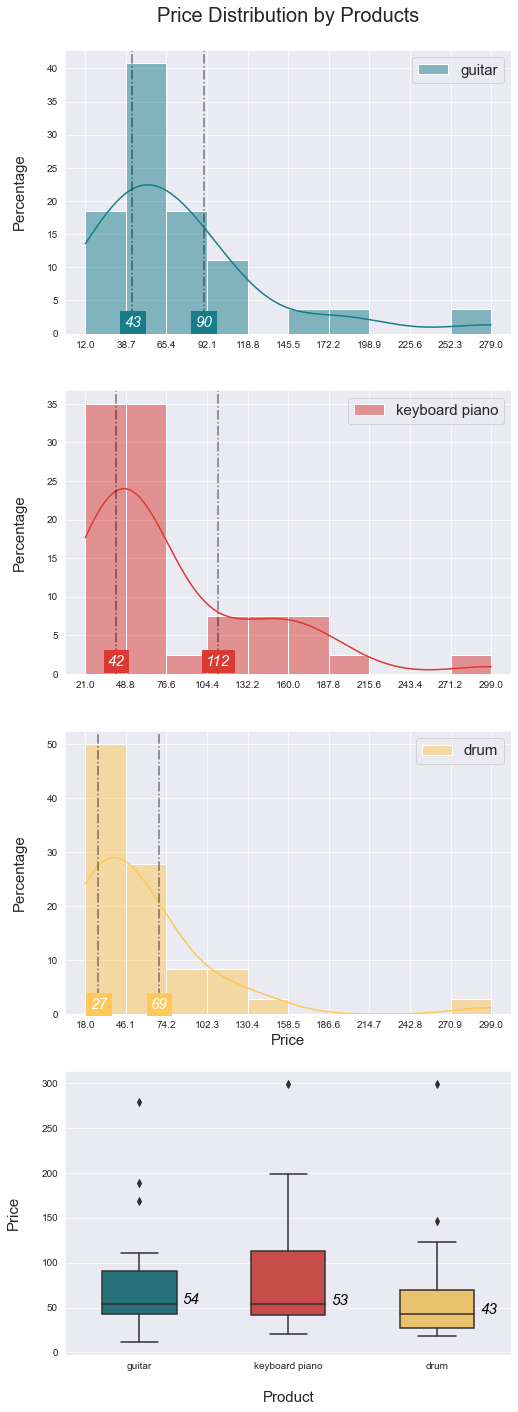

In [6]:
fg, ax = plt.subplots(figsize=(8, 24), ncols=1, nrows=4)

ax[0].set_title('Price Distribution by Products\n', fontsize=20)

bins = 10
for ind, i in enumerate(product):
    sns.histplot(data=df_g[df_g['keyword']==i], x='price', bins=bins, kde=True, stat='percent', ax=ax[ind], label=i, color=colors[i])

for i in range(3):
    ax[i].legend(fontsize=15)
    ax[i].set(xlabel=None)
    ax[i].set_ylabel('Percentage\n', fontsize=15)
ax[2].set_xlabel('Price', fontsize=15)

for ind, i in enumerate(product):
    mini = df_g[df_g['keyword']==i]['price'].min()
    maxi = df_g[df_g['keyword']==i]['price'].max()
    ax[ind].set_xticks(np.linspace(mini, maxi, bins+1))
    
    for x in ['25%', '75%']:
        q = int(df_g[df_g['keyword']==i]['price'].describe()[x])
        ax[ind].axvline(q, color = 'k', alpha=.5, ls='-.')
        ax[ind].annotate(f'{round(q, 2)}', (q, 1.1), fontsize=15, color='w', fontstyle='italic', backgroundcolor=colors[i], ha='center')
    
sns.boxplot(data=df_g, x='keyword', y='price', width=.5, palette=colors, order=product, ax=ax[3])
ax[3].set_xlabel('\nProduct', fontsize=15)
ax[3].set_ylabel('Price\n', fontsize=15)

mean_sr = df_g.groupby('keyword').median()['price'].to_dict()
for ind, i in enumerate(product):
    ax[3].annotate(math.floor(mean_sr[i]), (ind+.35, mean_sr[i]), fontsize=15, color='k', fontstyle='italic', ha='center')    

## Star Rating & Comment Sentiment Rating Distribution by Products

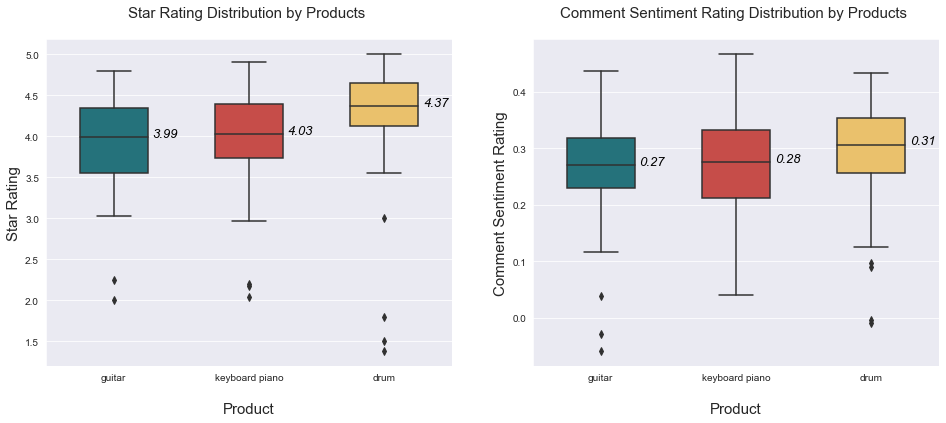

In [7]:
fg, ax = plt.subplots(figsize=(16, 6), nrows=1, ncols=2)

title = {'stars': 'Star Rating', 'comment_sentiment': 'Comment Sentiment Rating'}

for ind, i in enumerate(['stars', 'comment_sentiment']):
    sns.boxplot(data=df_g, y=i, x='keyword', palette=colors, order=product, width=.5, ax=ax[ind])
    ax[ind].set_title(f'{title[i]} Distribution by Products \n', fontsize=15)
    ax[ind].set_ylabel(f'{title[i]}', fontsize=15)
    ax[ind].set_xlabel('\nProduct', fontsize=15)
    
    mean_sr = df_g.groupby('keyword').median()[i].to_dict()
    for ind_x, x in enumerate(product):
        ax[ind].annotate(round(mean_sr[x],2), (ind_x+.38, mean_sr[x]), fontsize=13, color='k', fontstyle='italic', ha='center')

## Correlation

Text(0.5, 1.0, 'Correlation Heat Map\n')

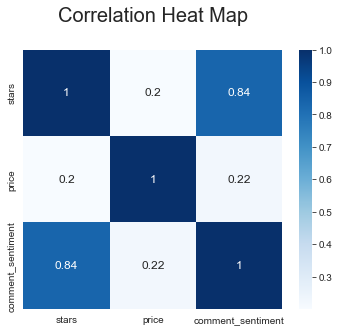

In [9]:
fg = plt.figure(figsize=(5, 4))
ax = fg.add_axes([.1,.1,.9,.9])

df_cor = df_g.corr()
sns.heatmap(df_cor, cmap='Blues', annot=True, annot_kws={"size": 12})
ax.set_title('Correlation Heat Map\n', fontsize=20)

Text(0.5, 0.98, 'Correlation Pair Plot')

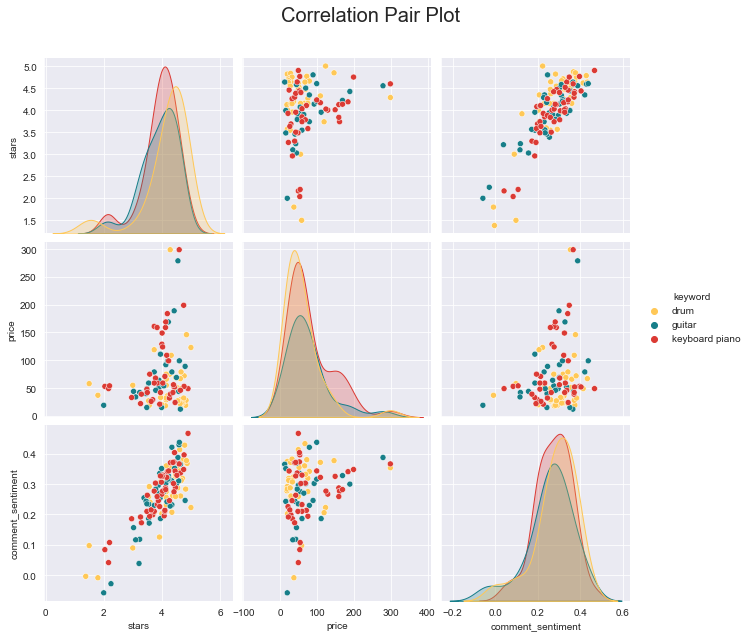

In [10]:
g = sns.pairplot(data=df_g, hue='keyword', palette=colors, height=3, aspect=1)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle("Correlation Pair Plot", fontsize=20)

Text(0.5, 0.98, 'Star Rating v.s Comment Sentiment Rating\n')

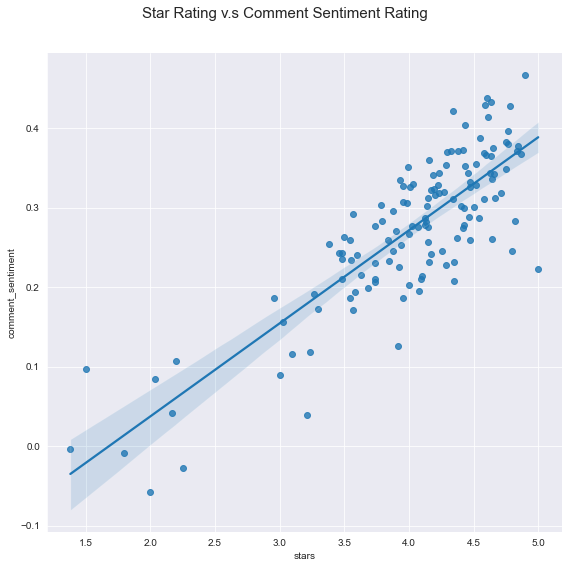

In [12]:
g = sns.lmplot(data=df_g, x='stars', y='comment_sentiment', height=8, aspect=1)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle("Star Rating v.s Comment Sentiment Rating\n", fontsize=15)

# Desicion Making
> In the first part of this section, we will list the top 10 star-rated products along with their comment sentiment across different categories. Products with fewer than 10 reviews have been removed from this analysis because the standard error for these products may be too large. For the second part, we will plot all products on a star/comment sentiment scatterplot across different categories and only indicate those that have a star and comment sentiment rating of at least the 80th quantile and a price within the reasonable range (25th to 75th quantile) as the best selections.

## Top 10 Star-rated Products

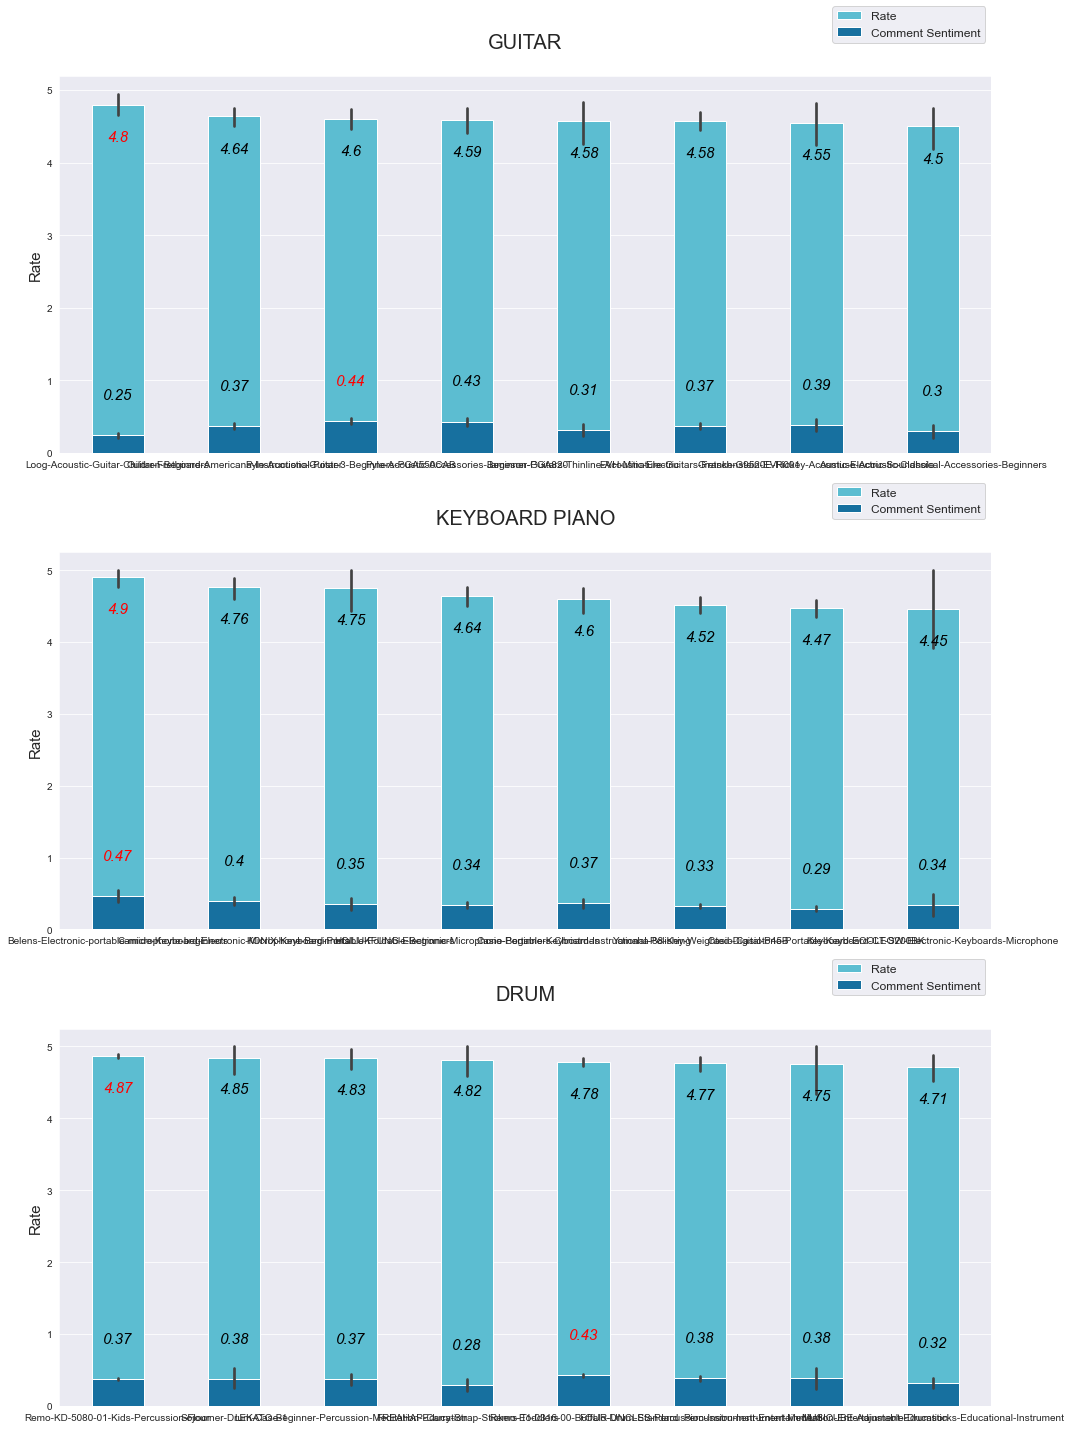

In [13]:
df_temp = df.groupby('title').count()
item_to_remove = df_temp[df_temp['position'] <= 10].index.values
df_new = df[~df['title'].isin(item_to_remove)]
df_new_g = df_new.groupby(['keyword', 'title']).mean().reset_index('keyword').sort_values(by=['keyword', 'stars'], ascending=False)

fg, ax = plt.subplots(figsize=(15, 20), nrows=3, ncols=1, tight_layout=True)
for ind, i in enumerate(product):
    title = df_new_g[df_new_g['keyword']==i].head(8).index.values
    rate = df_new_g[df_new_g['keyword']==i].head(8)['stars'].values
    sent = df_new_g[df_new_g['keyword']==i].head(8)['comment_sentiment'].values
    sns.barplot(data=df_new[df_new['title'].isin(title)], x='title', y='stars', ax=ax[ind], order=title, color='#48cae4', width=.45, label='Rate')
    sns.barplot(data=df_new[df_new['title'].isin(title)], x='title', y='comment_sentiment', ax=ax[ind], order=title, color='#0077b6', width=.45, label='Comment Sentiment')
    for ind_x, x in enumerate(rate):
        if x == max(rate):
            color = 'r'
        else:
            color = 'k'
        ax[ind].annotate(round(x,2), (ind_x, x-.5), fontsize=15, ha='center', color=color, style='italic')
    for ind_x, x in enumerate(sent):
        if x == max(sent):
            color = 'r'
        else:
            color = 'k'
        ax[ind].annotate(round(x,2), (ind_x, x+.5), fontsize=15, ha='center', color=color, style='italic')
    title = [i.replace('-', '\n') for i in title]
    ax[ind].set_title(f'{i.upper()}\n', fontsize=20)
    ax[ind].set_ylabel(f'Rate', fontsize=15)
    ax[ind].set(xlabel=None)
    ax[ind].legend(fontsize=12, bbox_to_anchor=(1, 1.2))

## Best Selections

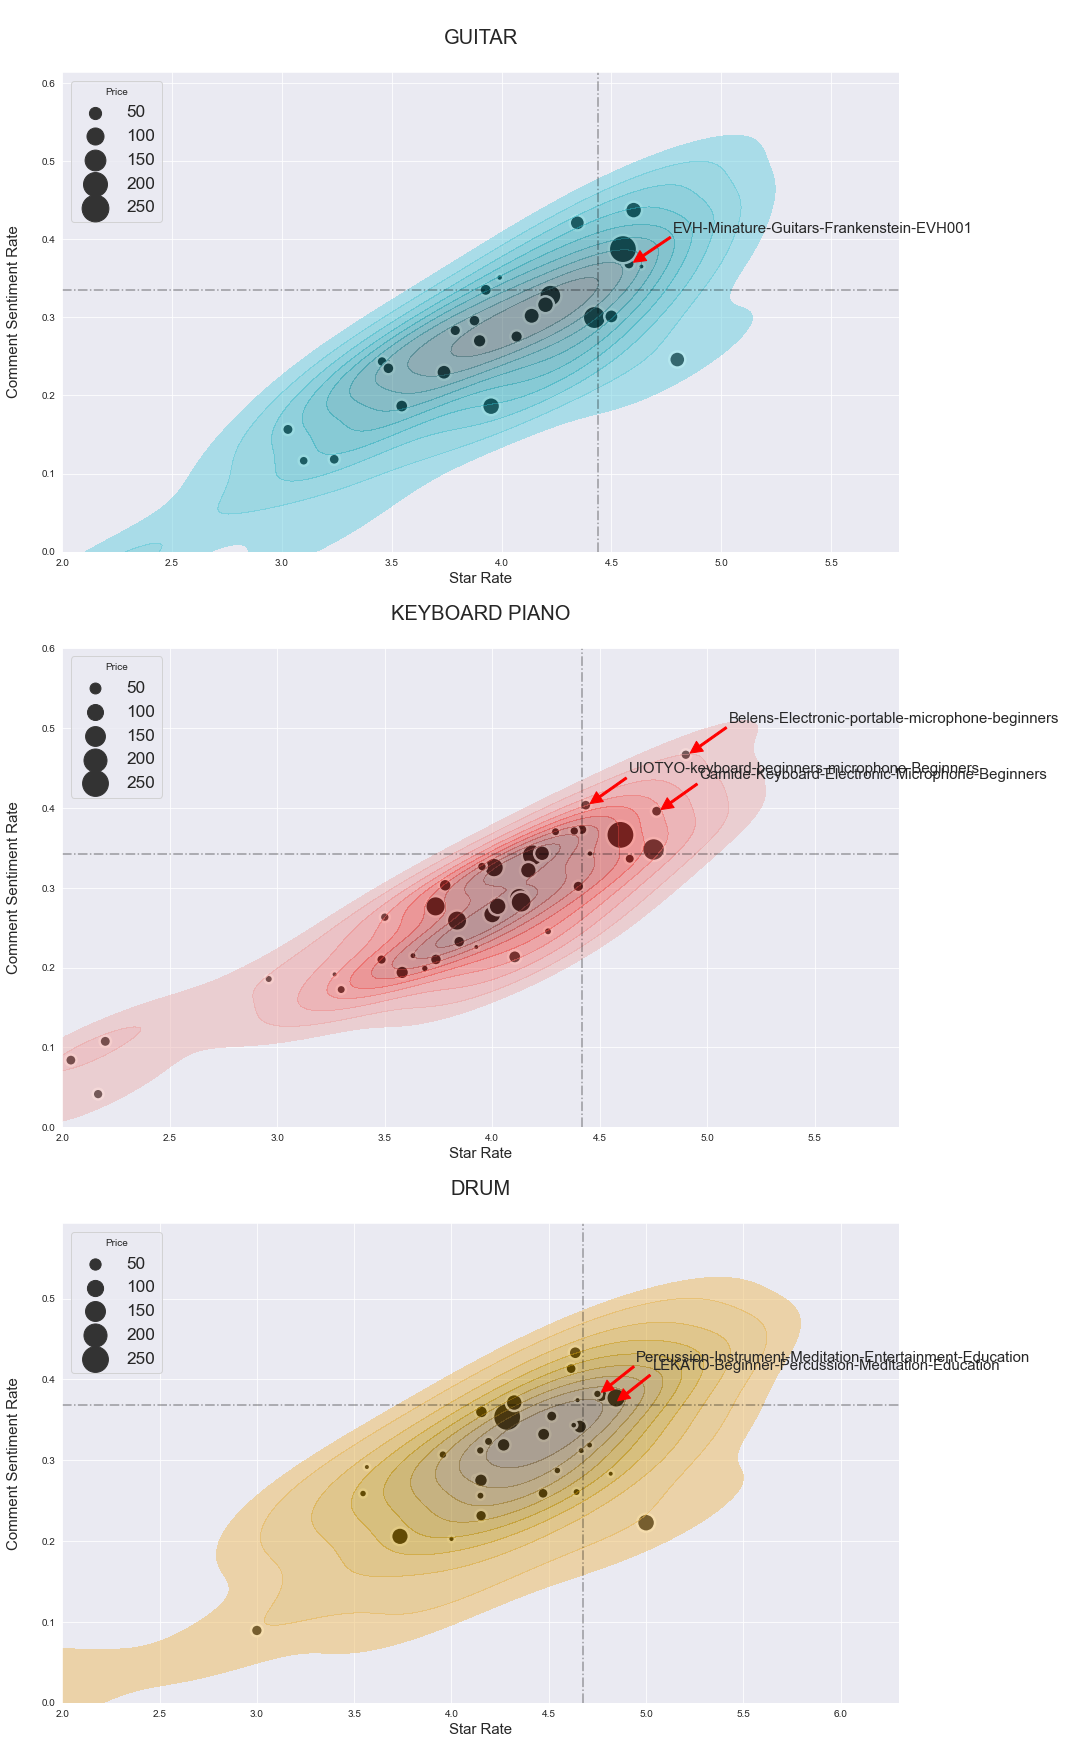

In [14]:
fg, ax = plt.subplots(figsize=(15, 30), nrows=3, ncols=1)

for ind, i in enumerate(product):
    sns.scatterplot(data=df_g[df_g['keyword']==i], x='stars', y='comment_sentiment', size='price',
                    sizes=(40, 800), color='k', edgecolor='w', linewidth=2.5, ax=ax[ind])
    sns.kdeplot(data=df_g[df_g['keyword']==i], x='stars', y='comment_sentiment', color=colors[i], alpha=.5, ax=ax[ind], fill=True)
    ax[ind].set_title(f'\n{i.upper()}\n', fontsize=20)
    ax[ind].set_xlabel('Star Rate', fontsize=15)
    ax[ind].set_ylabel('Comment Sentiment Rate\n', fontsize=15)
    ax[ind].legend(loc=2, fontsize='xx-large', title='Price')

df_best_ls = []
for ind, i in enumerate(product):
    star_q = df_g[df_g['keyword']==i]['stars'].quantile(q=.8)
    sent_q = df_g[df_g['keyword']==i]['comment_sentiment'].quantile(q=.8)
    price_q_25 = int(df_g[df_g['keyword']==i]['price'].describe()['25%'])
    price_q_75 = int(df_g[df_g['keyword']==i]['price'].describe()['75%'])

    df_best = df_g[df_g['keyword']==i][(df_g[df_g['keyword']==i]['stars'] >= star_q) &
                                       (df_g[df_g['keyword']==i]['comment_sentiment'] >= sent_q) & 
                                       (df_g[df_g['keyword']==i]['price'] <= price_q_75) & 
                                       (df_g[df_g['keyword']==i]['price'] >= price_q_25)]
    df_best_ls.append(df_best)
    
    cor = []
    for i in range(df_best.shape[0]):
        title = df_best.index.values[i]
        star = df_best.iloc[i, 1]
        sent = df_best.iloc[i, 3]
        cor.append([title, (star, sent)])

    for i in cor:
        ax[ind].annotate(text=i[0], xy=(i[1][0]+.02, i[1][1]+.002), xytext=(i[1][0]+.2, i[1][1]+.04),
                    fontsize=15, arrowprops={'width': 2, 'shrink': True, 'color':'r'})

    ax[ind].axvline(star_q, color='k', alpha=.35, ls='-.')
    ax[ind].axhline(sent_q, color='k', alpha=.35, ls='-.')

    
    ax[ind].set_xlim(left=2)
    ax[ind].set_ylim(bottom=0)

In [15]:
df_best = pd.concat(df_best_ls)
titles = df_best.index.values
df_best = df[df['title'].isin(titles)].drop(columns=['position', 'name', 'stars', 'date', 'comment', 'comment_sentiment']).drop_duplicates().set_index('title')
tit = df_best['link'].index.values
link = df_best['link'].values
key = df_best['keyword'].values
price = df_best['price'].values
print('Best Selections:\n')
for i in range(df_best.shape[0]):
    print(f'{key[i]}: {tit[i]} (${price[i]})')
    print(link[i])

Best Selections:

guitar: EVH-Minature-Guitars-Frankenstein-EVH001 ($44.0)
https://www.amazon.com/EVH-Minature-Guitars-Frankenstein-EVH001/dp/B01JRHCACC
keyboard piano: Camide-Keyboard-Electronic-Microphone-Beginners ($53.0)
https://www.amazon.com/Camide-Keyboard-Electronic-Microphone-Beginners/dp/B09YXVJ75X
keyboard piano: Belens-Electronic-portable-microphone-beginners ($49.0)
https://www.amazon.com/Belens-Electronic-portable-microphone-beginners/dp/B0BBBY9LRJ
keyboard piano: UIOTYO-keyboard-beginners-microphone-Beginners ($52.0)
https://www.amazon.com/UIOTYO-keyboard-beginners-microphone-Beginners/dp/B0B9WP29VX
drum: LEKATO-Beginner-Percussion-Meditation-Education ($28.0)
https://www.amazon.com/LEKATO-Beginner-Percussion-Meditation-Education/dp/B0B5DM4BR9
drum: Percussion-Instrument-Meditation-Entertainment-Education ($32.0)
https://www.amazon.com/Percussion-Instrument-Meditation-Entertainment-Education/dp/B09QPTCCNB
